In [1]:
import os
import re
import numpy as np
import pandas as pd

In [2]:
# 원본 엑셀 파일 리스트 읽어오기, raw-files 폴더
RAW_FILES_PATH = 'raw-files'

raw_files = os.listdir(RAW_FILES_PATH)
raw_files = [ f'{RAW_FILES_PATH}/{r}' for r in raw_files ]
raw_files[0], len(raw_files)

('raw-files/아파트(매매)_실거래가_201208.xlsx', 96)

In [3]:
# 원본 엑셀 데이터 컬럼명
RAW_FILE_COLUMNS = ['region', 'street_num', 'street_num1', 'street_num2',
                    'apt_name', 'apt_size', 'contract_yymm', 'contract_dd',
                    'contract_price', 'apt_floor','completion_year','street_name']

In [4]:
# data-files 폴더 만들기
DATA_FILES_PATH = 'data-files'

if not(os.path.isdir(DATA_FILES_PATH)):
    os.makedirs(os.path.join(DATA_FILES_PATH))

In [5]:
# 기록할 파일 리스트 만들기
data_files = []
for rf in raw_files:
    p = re.compile('[0-9]+')
    date_name = p.findall(rf)
    data_files.append(f'{DATA_FILES_PATH}/{date_name[0]}.csv')

# files_zip = zip(raw_files, data_files)
data_files[0], len(data_files)

('data-files/201208.csv', 96)

In [6]:
# 수정 CSV 데이터 컬럼명
DATA_FILE_COLUMNS = ['region', 'region_sub', 'apt_name', 'apt_size',
                     'apt_floor', 'contract_date', 'contract_price',
                     'completion_year', 'street_num', 'street_name']

# region = 도, 광역시, 특별시
# region_sub = 시군구
# apt_name = 단지명
# apt_size = 전용면적
# apt_floor = 층
# contract_date = 계약년월일
# contract_price = 거래금액
# completion_year = 건축년도
# street_num = 번지
# street_name = 도로명


In [142]:
# 엑셀 파일 로드 테스트
fileD = pd.read_excel(raw_files[0], index_col=None, header=None, skiprows=17)
fileD.columns = RAW_FILE_COLUMNS

fileD.info()
fileD.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26054 entries, 0 to 26053
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           26054 non-null  object 
 1   street_num       26054 non-null  object 
 2   street_num1      26054 non-null  int64  
 3   street_num2      26054 non-null  int64  
 4   apt_name         26054 non-null  object 
 5   apt_size         26054 non-null  float64
 6   contract_yymm    26054 non-null  int64  
 7   contract_dd      26054 non-null  int64  
 8   contract_price   26054 non-null  object 
 9   apt_floor        26054 non-null  int64  
 10  completion_year  26054 non-null  int64  
 11  street_name      26054 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.4+ MB


,region,street_num,street_num1,street_num2,apt_name,apt_size,contract_yymm,contract_dd,contract_price,apt_floor,completion_year,street_name
0,강원도 강릉시 견소동,202,202,0,송정한신,84.945,201208,24,"13,000",5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201208,27,"8,500",15,1997,경강로2539번길 8
2,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201208,31,"6,000",1,1997,경강로2539번길 8
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201208,8,"15,000",7,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201208,9,"16,500",9,2005,경강로2539번길 22


In [143]:
# 컬럼 추가 및 데이터 수정 함수
def buildRawD(D=None):
    if D is None:
        return 0

    region_str = D['region'].split(" ", 1)
    
    D['region'] = region_str[0]
    D['region_sub'] = region_str[1]

    D['apt_size'] = f'{D["apt_size"]:#.02f}'

    # yyyy-mm-dd 형식 변환
    yymm = str(D['contract_yymm'])
    D['contract_date'] = f'{yymm[:4]}-{yymm[4:]}-{D["contract_dd"]:#02d}'
    
    # ',' 제거, (만원) -> 0000 추가
    D['contract_price'] = D['contract_price'].replace(',', '') + '0000'

    return D


In [144]:
# 원본 데이터 수정
rawD = fileD.apply(buildRawD, axis=1)

rawD.info()
rawD.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26054 entries, 0 to 26053
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   region           26054 non-null  object
 1   street_num       26054 non-null  object
 2   street_num1      26054 non-null  int64 
 3   street_num2      26054 non-null  int64 
 4   apt_name         26054 non-null  object
 5   apt_size         26054 non-null  object
 6   contract_yymm    26054 non-null  int64 
 7   contract_dd      26054 non-null  int64 
 8   contract_price   26054 non-null  object
 9   apt_floor        26054 non-null  int64 
 10  completion_year  26054 non-null  int64 
 11  street_name      26054 non-null  object
 12  region_sub       26054 non-null  object
 13  contract_date    26054 non-null  object
dtypes: int64(6), object(8)
memory usage: 2.8+ MB


,region,street_num,street_num1,street_num2,apt_name,apt_size,contract_yymm,contract_dd,contract_price,apt_floor,completion_year,street_name,region_sub,contract_date
0,강원도,202,202,0,송정한신,84.94,201208,24,130000000,5,1997,경강로2539번길 8,강릉시 견소동,2012-08-24
1,강원도,202,202,0,송정한신,59.80,201208,27,85000000,15,1997,경강로2539번길 8,강릉시 견소동,2012-08-27
2,강원도,202,202,0,송정한신,59.80,201208,31,60000000,1,1997,경강로2539번길 8,강릉시 견소동,2012-08-31
3,강원도,289,289,0,송정해변신도브래뉴아파트,84.99,201208,8,150000000,7,2005,경강로2539번길 22,강릉시 견소동,2012-08-08
4,강원도,289,289,0,송정해변신도브래뉴아파트,84.99,201208,9,165000000,9,2005,경강로2539번길 22,강릉시 견소동,2012-08-09


In [145]:

# 필요 데이터 선택 및 컬럼 재배치, 데이터 변환하기
dataD = rawD.loc[:, DATA_FILE_COLUMNS]

dataD.info()
dataD.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26054 entries, 0 to 26053
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   region           26054 non-null  object
 1   region_sub       26054 non-null  object
 2   apt_name         26054 non-null  object
 3   apt_size         26054 non-null  object
 4   apt_floor        26054 non-null  int64 
 5   contract_date    26054 non-null  object
 6   contract_price   26054 non-null  object
 7   completion_year  26054 non-null  int64 
 8   street_num       26054 non-null  object
 9   street_name      26054 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.0+ MB


,region,region_sub,apt_name,apt_size,apt_floor,contract_date,contract_price,completion_year,street_num,street_name
0,강원도,강릉시 견소동,송정한신,84.94,5,2012-08-24,130000000,1997,202,경강로2539번길 8
1,강원도,강릉시 견소동,송정한신,59.80,15,2012-08-27,85000000,1997,202,경강로2539번길 8
2,강원도,강릉시 견소동,송정한신,59.80,1,2012-08-31,60000000,1997,202,경강로2539번길 8
3,강원도,강릉시 견소동,송정해변신도브래뉴아파트,84.99,7,2012-08-08,150000000,2005,289,경강로2539번길 22
4,강원도,강릉시 견소동,송정해변신도브래뉴아파트,84.99,9,2012-08-09,165000000,2005,289,경강로2539번길 22


In [146]:
# data-files 폴더에 수정한 데이터 csv 파일 저장
dataD.to_csv(data_files[0], mode='w', header=True, index=False)

In [16]:
# 파일 일괄 수정 및 저장 함수
def make_new_files(files_zip):
    
    total_count = 0
    for raw_path, data_path in files_zip:
        fileD = pd.read_excel(raw_path, index_col=None, header=None, skiprows=17)
        fileD.columns = RAW_FILE_COLUMNS
        
        rawD = fileD.apply(buildRawD, axis=1)
        dataD = rawD.loc[:, DATA_FILE_COLUMNS]

        dataD.to_csv(data_path, mode='w', header=True, index=False)

        data_count = len(dataD)
        total_count += data_count
        print(f'complete {data_path}, data count: {data_count}')
    
    print(f'total data count: {total_count}')

In [17]:
# 일괄 파일 만들기
# data-files 폴더 지우고 실행
# 소요 시간 3시간 15분!!!
# total data count: 4800528

# make_new_files(zip(raw_files, data_files))

In [151]:
# 생성 파일 로드 테스트
data_files[:]

['data-files/201208.csv',
 'data-files/201209.csv',
 'data-files/201210.csv',
 'data-files/201211.csv',
 'data-files/201212.csv',
 'data-files/201301.csv',
 'data-files/201302.csv',
 'data-files/201303.csv',
 'data-files/201304.csv',
 'data-files/201305.csv',
 'data-files/201306.csv',
 'data-files/201307.csv',
 'data-files/201308.csv',
 'data-files/201309.csv',
 'data-files/201310.csv',
 'data-files/201311.csv',
 'data-files/201312.csv',
 'data-files/201401.csv',
 'data-files/201402.csv',
 'data-files/201403.csv',
 'data-files/201404.csv',
 'data-files/201405.csv',
 'data-files/201406.csv',
 'data-files/201407.csv',
 'data-files/201408.csv',
 'data-files/201409.csv',
 'data-files/201410.csv',
 'data-files/201411.csv',
 'data-files/201412.csv',
 'data-files/201501.csv',
 'data-files/201502.csv',
 'data-files/201503.csv',
 'data-files/201504.csv',
 'data-files/201505.csv',
 'data-files/201506.csv',
 'data-files/201507.csv',
 'data-files/201508.csv',
 'data-files/201509.csv',
 'data-files

In [19]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
X= testD.drop(['region','region_sub','apt_name','contract_date','street_num','street_name'], axis=1)
y= testD['contract_price']

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [21]:
testD.describe() # 데이터 기초통계량

,apt_size,apt_floor,contract_price,completion_year
count,26054.000000,26054.00000,2.605400e+04,26054.000000
mean,74.624277,8.49858,1.930895e+08,1999.366393
std,27.460985,5.82383,1.510303e+08,7.534805
min,12.030000,1.00000,1.000000e+07,1962.000000
25%,59.400000,4.00000,1.000000e+08,1994.000000
50%,71.880000,8.00000,1.630000e+08,1999.000000
75%,84.950000,12.00000,2.400000e+08,2005.000000
max,283.110000,67.00000,3.500000e+09,2018.000000


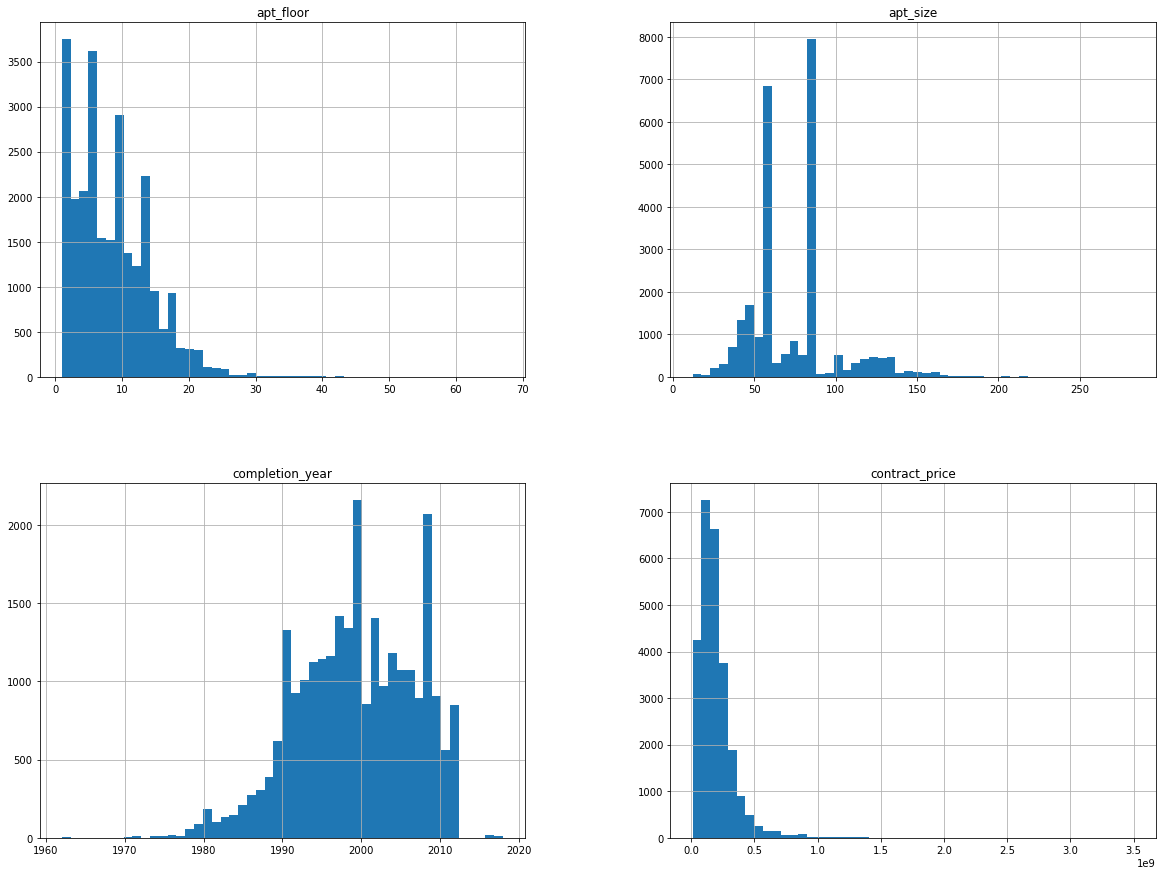

In [22]:
testD.hist(bins=50, figsize=(20,15)) # 히스토그램으로 데이터 분포 보기
plt.show()

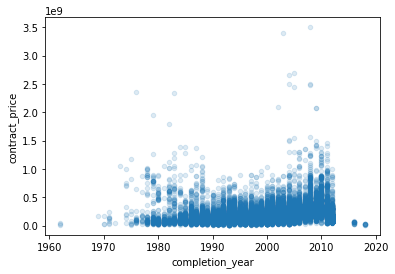

In [23]:
# 집값 비싼 순으로 시각화
ax = X.plot(kind="scatter", x="completion_year", y="contract_price", alpha=0.15)
ax.set(xlabel='completion_year', ylabel='contract_price')
plt.show()

In [24]:
X['contract_price']

0        130000000
1         85000000
2         60000000
3        150000000
4        165000000
           ...    
26049    247000000
26050     91000000
26051     72000000
26052    100000000
26053    153000000
Name: contract_price, Length: 26054, dtype: int64

In [25]:
X['completion_year']

0        1997
1        1997
2        1997
3        2005
4        2005
         ... 
26049    2007
26050    1994
26051    1994
26052    1994
26053    2002
Name: completion_year, Length: 26054, dtype: int64

In [26]:
# 상관관계
X_corr = X.corr()
X_corr

,apt_size,apt_floor,contract_price,completion_year
apt_size,1.000000,0.179302,0.627849,0.332186
apt_floor,0.179302,1.000000,0.241157,0.242638
contract_price,0.627849,0.241157,1.000000,0.284054
completion_year,0.332186,0.242638,0.284054,1.000000


In [27]:
X['completion_year'].sort_values(ascending=False)
X['completion_year'].unique()

array([1997, 2005, 2009, 1999, 2006, 1991, 1985, 2003, 1989, 1996, 1984,
       2000, 1998, 1994, 1988, 2007, 1992, 2008, 1987, 1986, 1990, 1995,
       1981, 2012, 1983, 2010, 2002, 2011, 2004, 2001, 1993, 1971, 1975,
       1982, 1979, 1980, 1978, 2016, 1976, 2018, 1977, 1962, 1974, 1970,
       1972, 1969, 1973], dtype=int64)

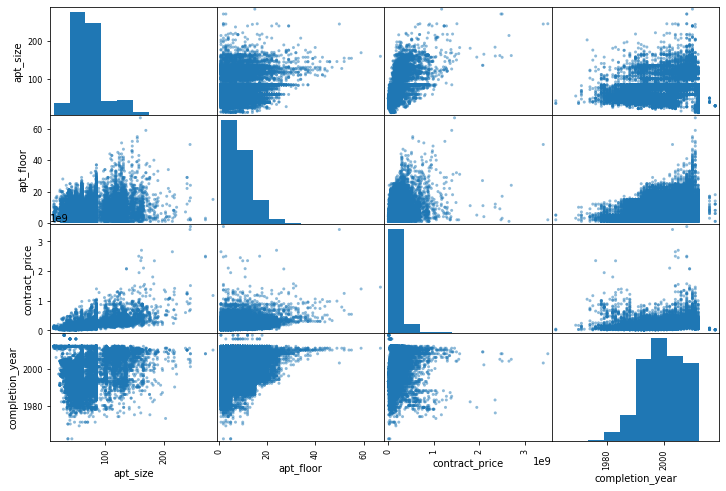

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(X, figsize=(12, 8))
plt.show()

In [163]:
pd.read_csv(data_files[1])

,region,region_sub,apt_name,apt_size,apt_floor,contract_date,contract_price,completion_year,street_num,street_name
0,강원도,강릉시 견소동,송정한신,84.94,15,2012-09-14,114000000,1997,202,경강로2539번길 8
1,강원도,강릉시 견소동,송정한신,59.80,8,2012-09-15,96500000,1997,202,경강로2539번길 8
2,강원도,강릉시 견소동,송정한신,39.08,12,2012-09-15,67000000,1997,202,경강로2539번길 8
3,강원도,강릉시 견소동,송정한신,39.08,8,2012-09-15,67000000,1997,202,경강로2539번길 8
4,강원도,강릉시 견소동,송정해변신도브래뉴아파트,84.99,1,2012-09-07,140000000,2005,289,경강로2539번길 22
...,...,...,...,...,...,...,...,...,...,...
34027,충청북도,충주시 호암동,호반현대,59.76,9,2012-09-17,80000000,1994,547-6,신촌2길 29
34028,충청북도,충주시 호암동,호반현대,59.76,1,2012-09-22,91000000,1994,547-6,신촌2길 29
34029,충청북도,충주시 호암동,호반현대,59.76,5,2012-09-24,100000000,1994,547-6,신촌2길 29
34030,충청북도,충주시 호암동,호암동수채,84.93,2,2012-09-03,165000000,2007,905,호암중앙1로 47


In [153]:
df = pd.DataFrame([ data for data in zip(data_files)])

In [171]:
data_files

['data-files/201208.csv',
 'data-files/201209.csv',
 'data-files/201210.csv',
 'data-files/201211.csv',
 'data-files/201212.csv',
 'data-files/201301.csv',
 'data-files/201302.csv',
 'data-files/201303.csv',
 'data-files/201304.csv',
 'data-files/201305.csv',
 'data-files/201306.csv',
 'data-files/201307.csv',
 'data-files/201308.csv',
 'data-files/201309.csv',
 'data-files/201310.csv',
 'data-files/201311.csv',
 'data-files/201312.csv',
 'data-files/201401.csv',
 'data-files/201402.csv',
 'data-files/201403.csv',
 'data-files/201404.csv',
 'data-files/201405.csv',
 'data-files/201406.csv',
 'data-files/201407.csv',
 'data-files/201408.csv',
 'data-files/201409.csv',
 'data-files/201410.csv',
 'data-files/201411.csv',
 'data-files/201412.csv',
 'data-files/201501.csv',
 'data-files/201502.csv',
 'data-files/201503.csv',
 'data-files/201504.csv',
 'data-files/201505.csv',
 'data-files/201506.csv',
 'data-files/201507.csv',
 'data-files/201508.csv',
 'data-files/201509.csv',
 'data-files

In [170]:
ns = data_files
for data in data_files:
    for n in ns:
        n = pd.read_csv(ns)

ValueError: Invalid file path or buffer object type: <class 'list'>

In [155]:
X= df.drop(['region','region_sub','apt_name','contract_date','street_num','street_name','contract_price'], axis=1)
y= testD['contract_price']

KeyError: "['region' 'region_sub' 'apt_name' 'contract_date' 'street_num'\n 'street_name' 'contract_price'] not found in axis"

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [118]:
lr=LinearRegression() # y = 가격, x = 다른 요소들 # 모델 평가와 성능 향상

In [119]:
lr.fit(X_train, y_train)

LinearRegression()

In [120]:
lr.coef_, lr.intercept_

(array([3240255.9245136 , 3199880.40166413, 1412466.4540799 ]),
 -2900194144.6201997)

In [121]:
print("선형회귀 계수 : ", lr.coef_)
print("선형회귀 절편 : ", lr.intercept_)

선형회귀 계수 :  [3240255.9245136  3199880.40166413 1412466.4540799 ]
선형회귀 절편 :  -2900194144.6201997


In [122]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.427683748788635, 0.37299942070656233)

In [123]:
# Ridge
from sklearn.linear_model import Ridge
rlr = Ridge(alpha=0.1)
rlr.fit(X_train, y_train)
rlr.score(X_train, y_train), rlr.score(X_test, y_test)

(0.4276837487886348, 0.3729994216440343)

In [124]:
llr = Lasso(alpha=0.01)
llr.fit(X_train, y_train)
llr.score(X_train, y_train), llr.score(X_test, y_test)

(0.42768374878863513, 0.37299942070749115)

In [125]:
X_train

,apt_size,apt_floor,completion_year
9952,48.69,12,2005
2677,39.90,10,1996
21899,39.84,9,1999
10263,60.00,1,1995
16671,12.89,3,2012
...,...,...,...
21575,59.99,8,2002
5390,59.40,4,1994
860,26.80,9,1998
15795,84.98,2,2005
